# [LAB 7-1] Learning rate, Evaluation

- [실습 동영상 7-1](https://youtu.be/oSJfejG2C3w): Learning rate, Evaluation
- [실습 슬라이드 7](https://docs.google.com/presentation/d/1cVwqMpERToATs1JGYps0F3MLARP8OAlw6ZIe-lpPHYs)


# Training and Test datasets

이제는 무조건 training set과 test set을 나누어서 작업!

### learning_rate=0.1

In [9]:
import tensorflow as tf

x_data = [[1, 2, 1],
          [1, 3, 2],
          [1, 3, 4],
          [1, 5, 5],
          [1, 7, 5],
          [1, 2, 5],
          [1, 6, 6],
          [1, 7, 7]]
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]


# Evaluation our model using this test dataset
x_test = [[2, 1, 1],
          [3, 1, 2],
          [3, 3, 4]]
y_test = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1]]

X = tf.placeholder("float", [None, 3]) # train할 때와 test할 때의 데이터를 다르게 입력 (X: x_data / X: x_test)
Y = tf.placeholder("float", [None, 3]) # 이게 placeholder를 사용하는 이유! 
W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))

hypothesis = tf.nn.softmax(tf.matmul(X, W)+b)
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Correct prediction test model
prediction = tf.argmax(hypothesis, 1)
is_correct = tf.equal(prediction, tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# Launch graph
with tf.Session() as sess:
    # initialize tensorflow variables
    sess.run(tf.global_variables_initializer())
    for step in range(201):
        cost_val, W_val, _ = sess.run([cost, W, optimizer], feed_dict={X: x_data, Y: y_data})
        if step % 100 == 0:
            print(step, cost_val, W_val)

    # predict
    print("Prediction:", sess.run(prediction, feed_dict={X: x_test}))
    # Calculate the accuracy
    print("Accuracy: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))

0 4.0953927 [[ 0.97045416 -0.638319   -0.440653  ]
 [-1.8165996   0.41645554 -0.61373717]
 [-0.07345881 -0.6208512   0.31327146]]
100 0.80565584 [[-0.2288093  -0.72015613  0.8404474 ]
 [-0.61640465 -0.75389576 -0.6435805 ]
 [ 0.00515791  0.12292323 -0.50911963]]
200 0.64239776 [[-0.83111346 -0.74117     1.4637656 ]
 [-0.53902    -0.7375802  -0.7372804 ]
 [ 0.16834496  0.13839284 -0.687776  ]]
Prediction: [2 2 2]
Accuracy:  1.0


### learning_rate=[0.1, 10.0, 1e-100] 인 경우 케이스 비교

In [38]:
import tensorflow as tf

x_data = [[1, 2, 1],
          [1, 3, 2],
          [1, 3, 4],
          [1, 5, 5],
          [1, 7, 5],
          [1, 2, 5],
          [1, 6, 6],
          [1, 7, 7]]
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]


# Evaluation our model using this test dataset
x_test = [[2, 1, 1],
          [3, 1, 2],
          [3, 3, 4]]
y_test = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1]]

X = tf.placeholder("float", [None, 3]) # train할 때와 test할 때의 데이터를 다르게 입력 (X: x_data / X: x_test)
Y = tf.placeholder("float", [None, 3]) # 이게 placeholder를 사용하는 이유! 
W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))

learning_rates = [0.1, 10.0, 1e-100]
for learning_rate in learning_rates:
    print("learning_rate=", learning_rate, "\n");

    hypothesis = tf.nn.softmax(tf.matmul(X, W)+b)
    cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

    # Correct prediction test model
    prediction = tf.argmax(hypothesis, 1)
    is_correct = tf.equal(prediction, tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

    # Launch graph
    with tf.Session() as sess:
        # initialize tensorflow variables
        sess.run(tf.global_variables_initializer())
        for step in range(201):
            cost_val, W_val, _ = sess.run([cost, W, optimizer], feed_dict={X: x_data, Y: y_data})
            if(step%50==0):
                print("step: ", step, "\ncost: ", cost_val, "\nW: \n", W_val, "\n")

        # predict
        print("Prediction:", sess.run(prediction, feed_dict={X: x_test}))
        # Calculate the accuracy
        print("Accuracy: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))
    print("\n")

learning_rate= 0.1 

step:  0 
cost:  5.236453 
W: 
 [[-0.6574761   0.57657224  0.8407245 ]
 [ 0.8380136   0.6963624   1.291002  ]
 [ 1.4481996  -0.8285357   0.08477776]] 

step:  50 
cost:  0.60171413 
W: 
 [[-0.9964413   0.70958716  1.0466748 ]
 [ 0.96509     0.9692966   0.8909916 ]
 [ 0.7905054   0.29510847 -0.38117203]] 

step:  100 
cost:  0.55947727 
W: 
 [[-1.1906787   0.6793575   1.2711419 ]
 [ 1.0548108   0.90949374  0.8610738 ]
 [ 0.7771321   0.3763802  -0.4490699 ]] 

step:  150 
cost:  0.5319862 
W: 
 [[-1.3604889   0.6600006   1.4603089 ]
 [ 1.0780892   0.91137487  0.8359135 ]
 [ 0.8207003   0.39021757 -0.5064751 ]] 

step:  200 
cost:  0.5097165 
W: 
 [[-1.5182364  0.6523783  1.6256788]
 [ 1.0862275  0.9200321  0.8191175]
 [ 0.8744266  0.3916894 -0.561673 ]] 

Prediction: [2 2 2]
Accuracy:  1.0


learning_rate= 10.0 

step:  0 
cost:  7.3156333 
W: 
 [[  1.7456031   4.952132   -5.5093093]
 [ 15.83849    16.634905  -33.386547 ]
 [ 16.356192   17.68999   -34.012455 ]] 

ste

## learning_rate 결과 분석

### learning_rate=10.0
- 위 실험에서 learning_rate=1.5인 경우 중간부터 `nan`이라는 값이 나오기 시작한다.
- `nan`은 not a number라는 뜻으로 이때부터는 더이상 학습을 포기한다.
- 이는 learning rate가 너무 커서 값이 발산하는 것!
- nan이 나오기 시작한다면 learning rate를 줄여보자!

### learning_rate=1e-100
- cost의 변화가 거의 없다!
- 이 경우, local minima에 빠져있을 확률이 많다.


### Normalize inputs (min-max scale)

아래 그림 좌측과 같이 입력된 데이터가 너무 크거나 너무 작은 값들이 섞여있거나, 데이터가 들쭉날쭉한 경우 등의 경우 gradient descent가 잘 되지 않을 수 있다. 이 경우 normalize를 통해 해결할 수 있다.

![normalize-inputs](images/lab7/normalize-inputs.png)


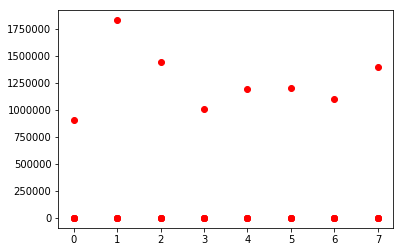

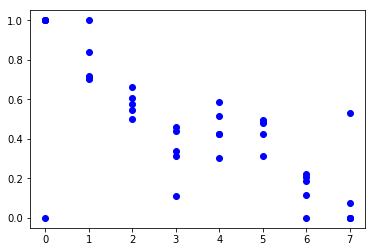

In [49]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)

    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

# before normalize
plt.plot(xy, 'ro')
plt.show()

# after normalize
normalized_ = MinMaxScaler(xy)
plt.plot(normalized_, 'bo')
plt.show()


위 빨간 점 그래프는 normalize되지 않은 그래프이며, 파란 점 그래프는 normalize된 그래프이다. 기존 0~1,750,000이었던 그래프가 0.0~1.0 사이로 normalize가 되었다.

normalize된 데이터는 gradient descent가 더 잘 된다!
